In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [2]:
results = pd.read_csv('./final_results.csv')
results = pd.read_csv('./results_aug_2022.csv')

In [4]:
question_names = {
    0 :'Camel Case',
    1 : 'multiply',
    2 : 'filter words by letter',
    3 : 'euclidian distance',
    4 : 'change keys and values',
    5 : 'has repeating letters',
    6 : 'upper vs lower',
}

In [5]:
wrong_answers = [69,83,23,108,130,157,43,95,4,24,5,31,38,66,73,160,178] # Checked manually

In [6]:
results['correct']=True
results.loc[wrong_answers,'correct'] = False

In [7]:
results = results.drop(results.index[results.participant_id == '9WrE7c6ALT8S']) # Outlier, doesn't know python.

In [49]:
participants = len(results.participant_id.unique())
print(f'N={participants}')

N=33


In [50]:
print(f'median time to answer = {results.time_in_seconds.median()}')

median time to answer = 72.5


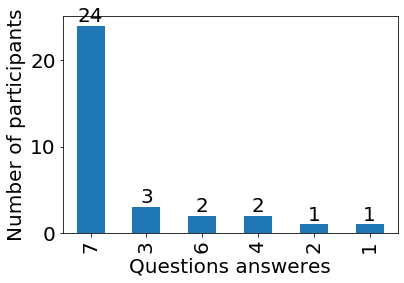

In [52]:
results.participant_id.value_counts().value_counts().plot(kind='bar')
ax = plt.gca()
rects = ax.patches
success_label = results.participant_id.value_counts().value_counts().values.tolist()
for rect, label in zip(rects, success_label):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )
plt.xlabel('Questions answeres')
plt.ylabel('Number of participants')
plt.savefig('./Graphs/Questions_Answered.png')

In [11]:
results.groupby('participant_id').time_in_seconds.sum().median()

486.0

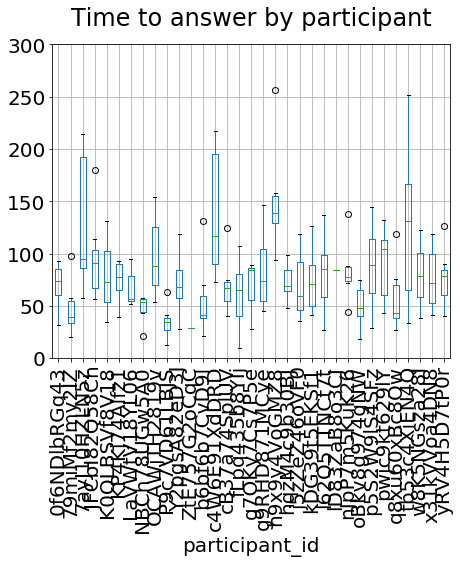

In [53]:
boxplot = results.boxplot(by='participant_id',column = 'time_in_seconds',figsize=(8,6))
boxplot.set_ylim([0,300])
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('')
plt.suptitle('Time to answer by participant')
plt.savefig('./Graphs/Participant_tta.png')

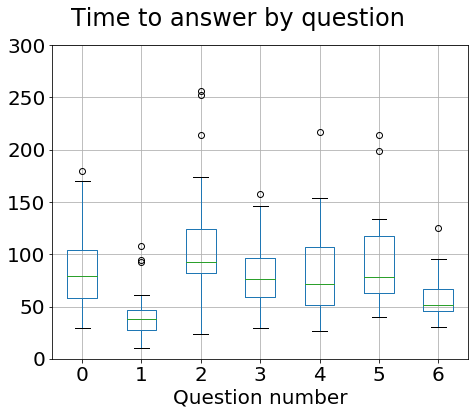

In [54]:
boxplot = results.boxplot(by='code_number',column = 'time_in_seconds',figsize=(7,6))
boxplot.set_ylim([0,300])
plt.tight_layout()
# plt.xticks([])
plt.title('')
plt.suptitle('Time to answer by question')

plt.xlabel('Question number')
plt.savefig('./Graphs/Questions_tta.png')

In [16]:
is_advanced = results.groupby(['participant_id']).time_in_seconds.mean()<results.time_in_seconds.median()

In [56]:
del is_advanced

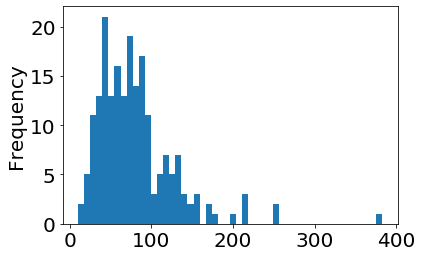

In [55]:
results.time_in_seconds.plot(kind='hist', bins=50)

In [57]:
results.groupby(['code_type'])['correct'].sum()

code_type
0    52.0
1    53.0
2    79.0
Name: correct, dtype: float64

In [58]:
results.groupby(['code_type'])['correct'].count()

code_type
0    56
1    57
2    87
Name: correct, dtype: int64

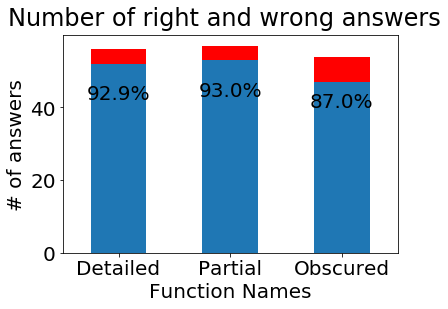

In [60]:
results[results.code_number !=0].groupby(['code_type'])['correct'].count().plot.bar(color = 'r')
results[results.code_number !=0].groupby(['code_type'])['correct'].sum().plot.bar()
plt.suptitle('Number of right and wrong answers')
plt.xticks([0,1,2],['Detailed','Partial','Obscured'],rotation=0)
plt.ylabel('# of answers')
ax = plt.gca()
rects = ax.patches
success_rate = (results[results.code_number !=0].groupby(['code_type'])['correct'].sum()/results[results.code_number !=0].groupby(['code_type'])['correct'].count()).values
success_label = [f'{100*v:.1f}%' for v in success_rate]
for rect, label in zip(rects, success_label):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height-15, label, ha="center", va="bottom"
    )
ax.set_xlabel('Function Names')
plt.savefig('./Graphs/Right_vs_Wrong.png')


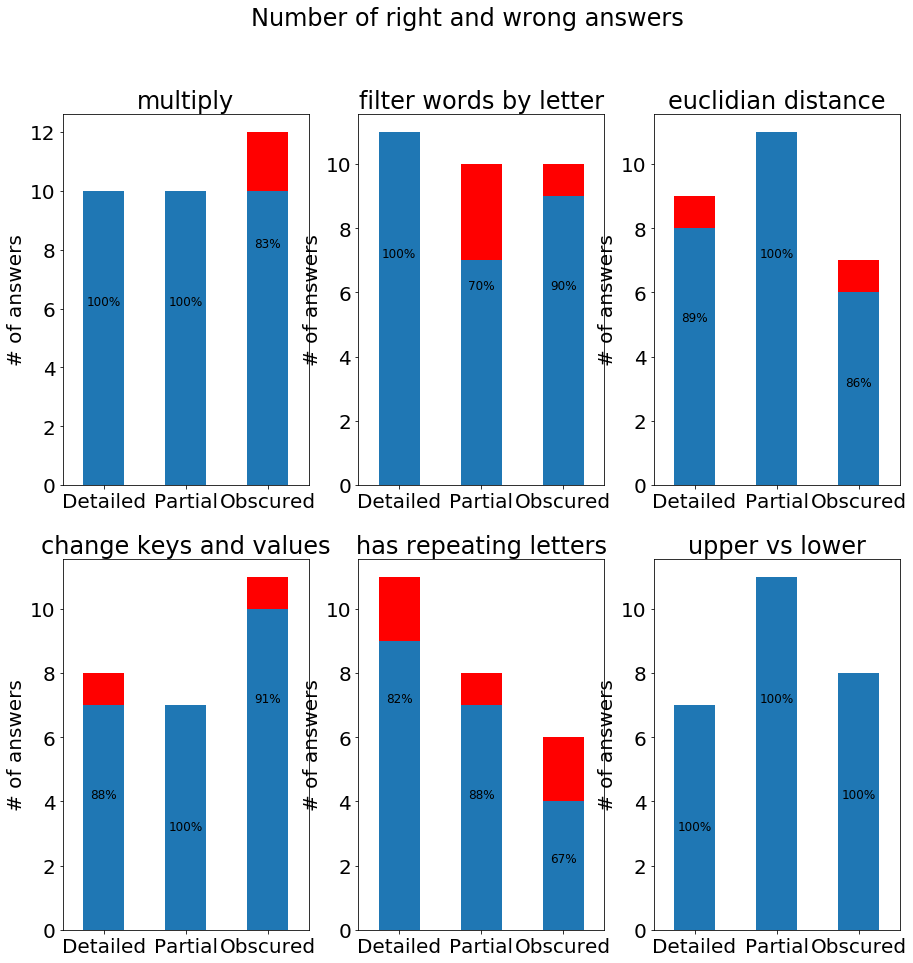

In [61]:
f, axx = plt.subplots(2,3, figsize = (15,15))
axx=axx.ravel()

for i_code_n in range(1,7):
    this_ax = axx[i_code_n-1]
    results[results.code_number==i_code_n].groupby(['code_type'])['correct'].count().plot(kind = 'bar',color = 'r',ax=this_ax)
    results[results.code_number==i_code_n].groupby(['code_type'])['correct'].sum().plot(kind = 'bar',ax=this_ax)
    plt.suptitle('Number of right and wrong answers')
    this_ax.set_xticklabels(['Detailed','Partial','Obscured'],rotation=0)
#     plt.xticks([0,1,2],['Detailed','Partial','Obscured'],rotation=0)
    this_ax.set_ylabel('# of answers')
    this_ax.set_xlabel('')
    rects = this_ax.patches
    success_rate = (results[results.code_number==i_code_n].groupby(['code_type'])['correct'].sum()/results[results.code_number==i_code_n].groupby(['code_type'])['correct'].count()).values
    success_label = [f'{100*v:.0f}%' for v in success_rate]
    for rect, label in zip(rects, success_label):
        height = rect.get_height()
        this_ax.text(
            rect.get_x() + rect.get_width() / 2, height-15+11, label, ha="center", va="bottom",fontsize=12

        )
    this_ax.set_title(question_names[i_code_n])
plt.savefig('./Graphs/Right_vs_Wrong_per_q.png')

In [22]:
results_c = results[(results.correct) & (results.code_number!=0)]

In [23]:
results_c.loc[:,('time_norm_q')]=0
results_c.loc[:,('time_norm_u')]=0

/home/sagiv/anaconda3/envs/main/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/sagiv/anaconda3/envs/main/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


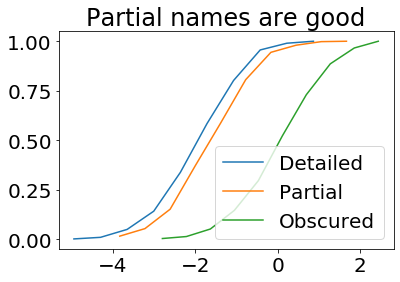

<Figure size 432x288 with 0 Axes>

In [63]:
N = 500
data = np.random.randn(N)-2
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Detailed")
data = np.random.randn(N)-1.7
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Partial")
data = np.random.randn(N)
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Obscured")
plt.title('Partial names are good')
plt.legend()
plt.show()
plt.savefig('./Graphs/expected_good.png')

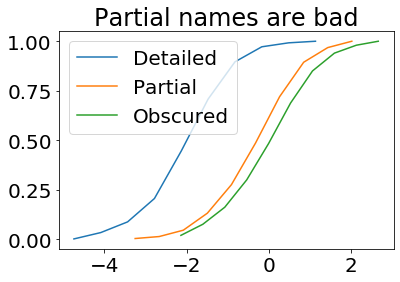

<Figure size 432x288 with 0 Axes>

In [64]:
N = 500
data = np.random.randn(N)-2
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Detailed")
data = np.random.randn(N)-0.3
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Partial")
data = np.random.randn(N)
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Obscured")
plt.title('Partial names are bad')
plt.legend()
plt.show()
plt.savefig('./Graphs/expected_bad.png')

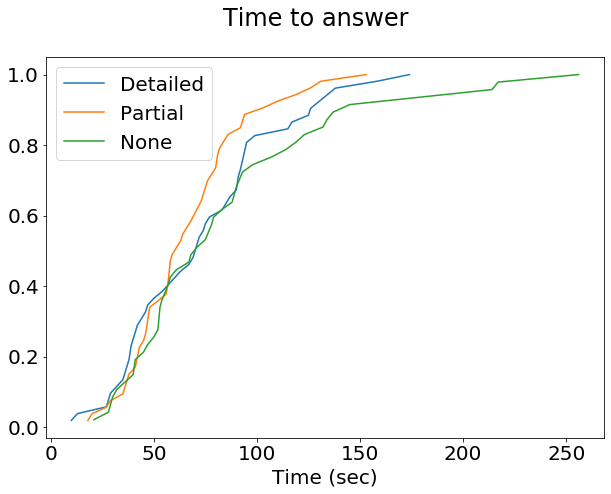

In [68]:
plt.rcParams.update({'font.size': 20})
q_types = ['Detailed','Partial','None']
f = plt.figure(figsize=(10,7))
for i_code_type in range(3):
    stats_df = results_c[results_c.code_type==i_code_type].groupby('time_in_seconds')['time_in_seconds'].agg('count')
    plt.plot(stats_df.cumsum()/stats_df.sum())
plt.legend(q_types)
plt.suptitle('Time to answer')
plt.xlabel('Time (sec)')

plt.savefig('./Graphs/CDF_time_all.png')


In [24]:
results_c.loc[:,('time_norm_q')] = results_c.time_in_seconds - results_c.groupby("code_number")["time_in_seconds"].transform('mean')

In [25]:
results_c.loc[:,('time_norm_u')] = results_c.time_in_seconds - results_c.groupby("participant_id")["time_in_seconds"].transform('mean')

In [26]:
results_c.loc[:,('time_norm_q')] =results_c['time_norm_q']-results_c['time_norm_q'].min()
results_c.loc[:,('time_norm_u')] =results_c['time_norm_u']-results_c['time_norm_u'].min()

/home/sagiv/anaconda3/envs/main/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


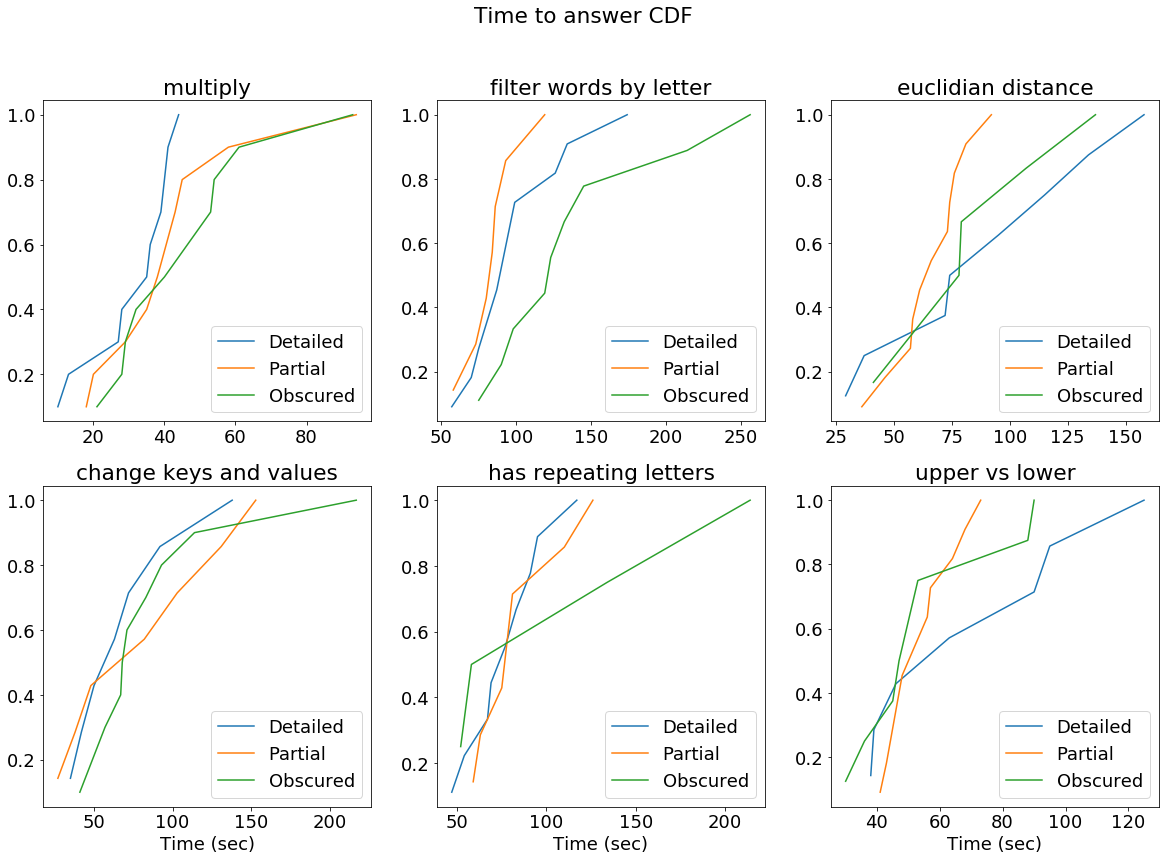

In [69]:
res = [[] for _ in range(6)]
plt.rcParams.update({'font.size': 18})

for i_code_n in range(1,7):
    for i_code_t in range(3):
        temp_df = results_c[(results_c.code_number == i_code_n) & (results.code_type==i_code_t)]
        stats_df = temp_df.groupby('time_in_seconds')['time_in_seconds'].agg('count')
        
        res[i_code_n-1].append(stats_df.cumsum()/stats_df.sum())
f,ax = plt.subplots(2,3,figsize=(20,13))
q_types = ['Detailed','Partial','Obscured']
ax=ax.ravel()
for i_code_n in range(6):
    for i_code_t in range(3):
        ax[i_code_n].plot(res[i_code_n][i_code_t],label=q_types[i_code_t])
    ax[i_code_n].legend()
    ax[i_code_n].set_title(question_names[i_code_n+1])
    if i_code_n >2:
        ax[i_code_n].set_xlabel('Time (sec)')
plt.suptitle('Time to answer CDF')

plt.savefig('./Graphs/CDF_time_per_q.png')

In [40]:
results.experience_level.unique()

array(['2-5', '6-10', '>10', '0-1',
       '2nd+ year student with no industry experience'], dtype=object)

In [43]:
sum(results_c.experience_level == exp_level)

20

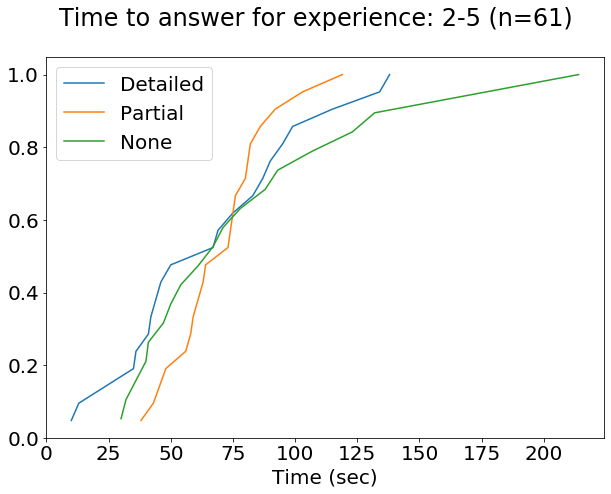

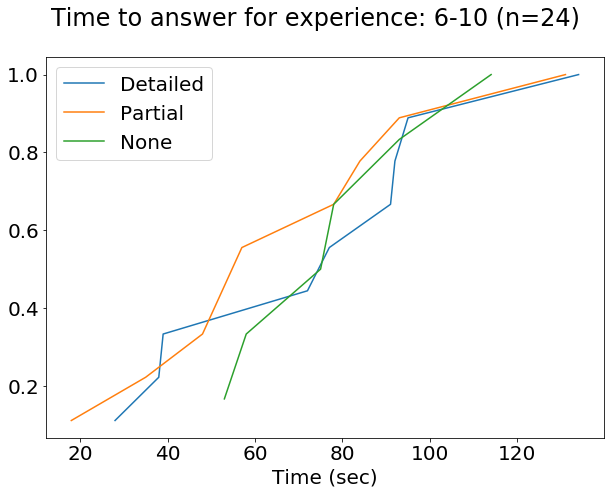

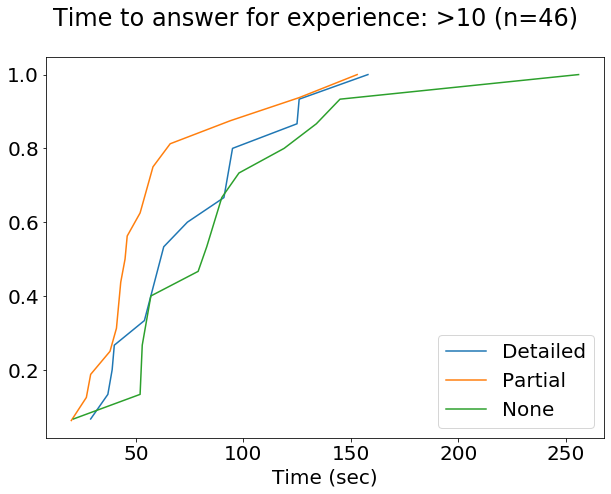

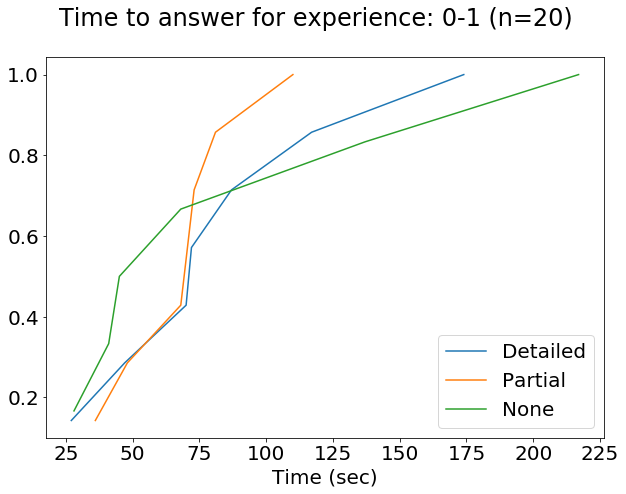

In [44]:
for exp_level in results.experience_level.unique()[:-1]:
    n_part = sum(results_c.experience_level == exp_level)
    plt.rcParams.update({'font.size': 20})
    q_types = ['Detailed','Partial','None']
    f = plt.figure(figsize=(10,7))
    for i_code_type in range(3):
        stats_df = results_c[(results_c.code_type==i_code_type) & (results_c.experience_level == exp_level)].groupby('time_in_seconds')['time_in_seconds'].agg('count')
        plt.plot(stats_df.cumsum()/stats_df.sum())
    plt.legend(q_types)
    plt.suptitle(f'Time to answer for experience: {exp_level} (n={n_part})')
    plt.xlabel('Time (sec)')


Text(0.5, 0, 'Time (sec)')

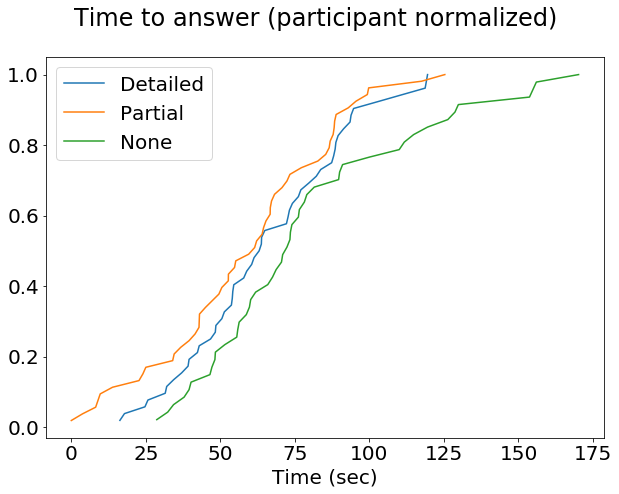

In [30]:
q_types = ['Detailed','Partial','None']
f = plt.figure(figsize=(10,7))
for i_code_type in range(3):
    stats_df = results_c[results_c.code_type==i_code_type].groupby('time_norm_u')['time_norm_u'].agg('count')
    plt.plot(stats_df.cumsum()/stats_df.sum())
plt.legend(q_types)
plt.suptitle('Time to answer (participant normalized)')
plt.xlabel('Time (sec)')

Text(0.5, 0, 'Time (sec)')

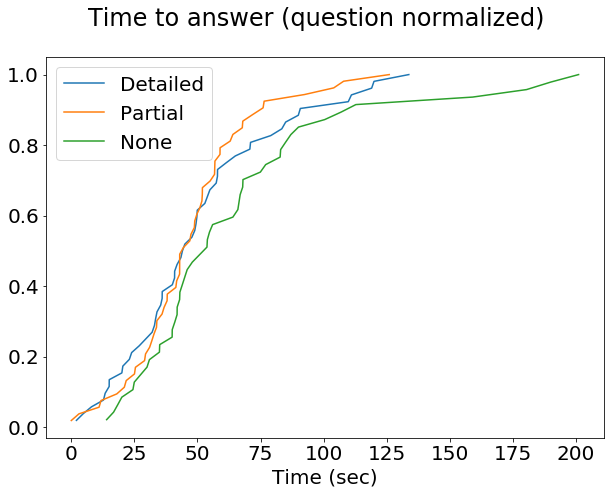

In [31]:
q_types = ['Detailed','Partial','None']
f = plt.figure(figsize=(10,7))
for i_code_type in range(3):
    stats_df = results_c[results_c.code_type==i_code_type].groupby('time_norm_q')['time_norm_q'].agg('count')
    plt.plot(stats_df.cumsum()/stats_df.sum())

plt.legend(q_types)
plt.suptitle('Time to answer (question normalized)')
plt.xlabel('Time (sec)')

/home/sagiv/anaconda3/envs/main/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 0.98, 'Time to answer CDF')

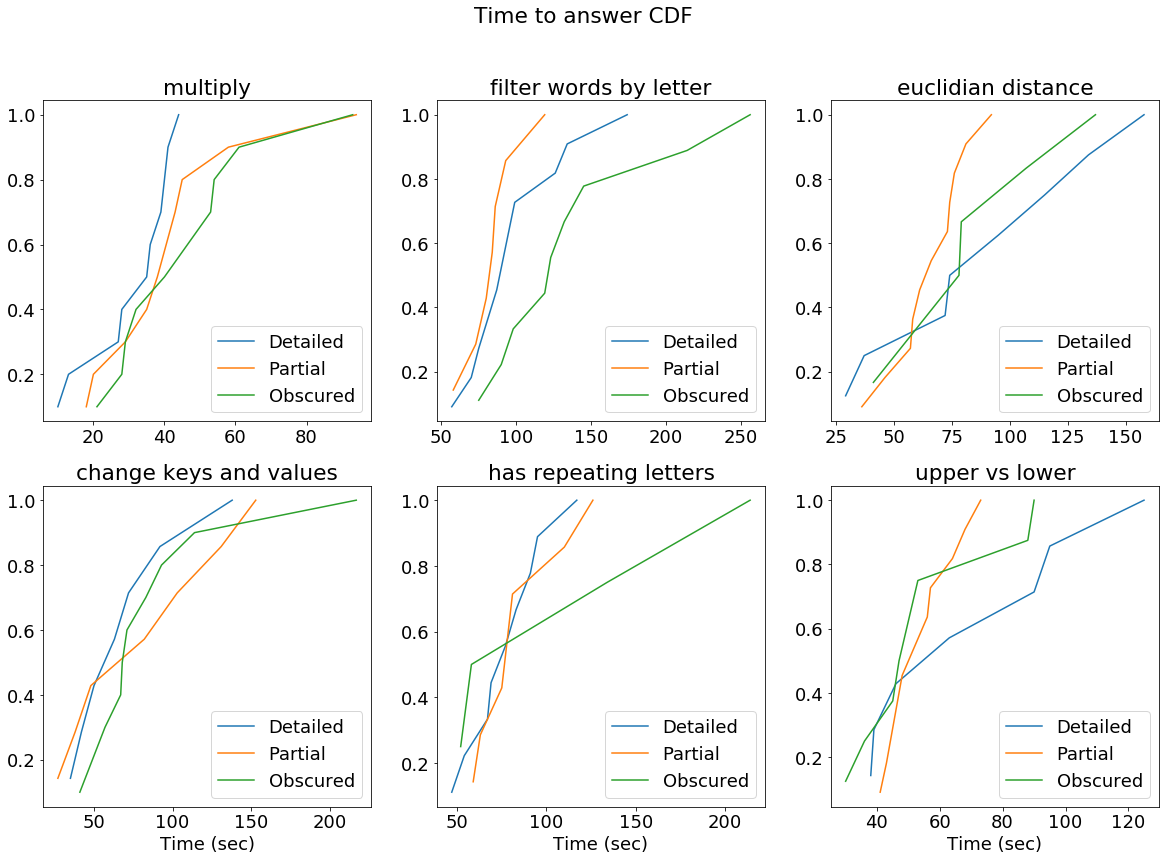

In [32]:
res = [[] for _ in range(6)]
plt.rcParams.update({'font.size': 18})

for i_code_n in range(1,7):
    for i_code_t in range(3):
        temp_df = results_c[(results_c.code_number == i_code_n) & (results.code_type==i_code_t)]
        stats_df = temp_df.groupby('time_in_seconds')['time_in_seconds'].agg('count')
        
        res[i_code_n-1].append(stats_df.cumsum()/stats_df.sum())
f,ax = plt.subplots(2,3,figsize=(20,13))
q_types = ['Detailed','Partial','Obscured']
ax=ax.ravel()
for i_code_n in range(6):
    for i_code_t in range(3):
        ax[i_code_n].plot(res[i_code_n][i_code_t],label=q_types[i_code_t])
    ax[i_code_n].legend()
    ax[i_code_n].set_title(question_names[i_code_n+1])
    if i_code_n >2:
        ax[i_code_n].set_xlabel('Time (sec)')
plt.suptitle('Time to answer CDF')

/home/sagiv/anaconda3/envs/main/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 0.98, 'Time to answer CDF (Participant normalised)')

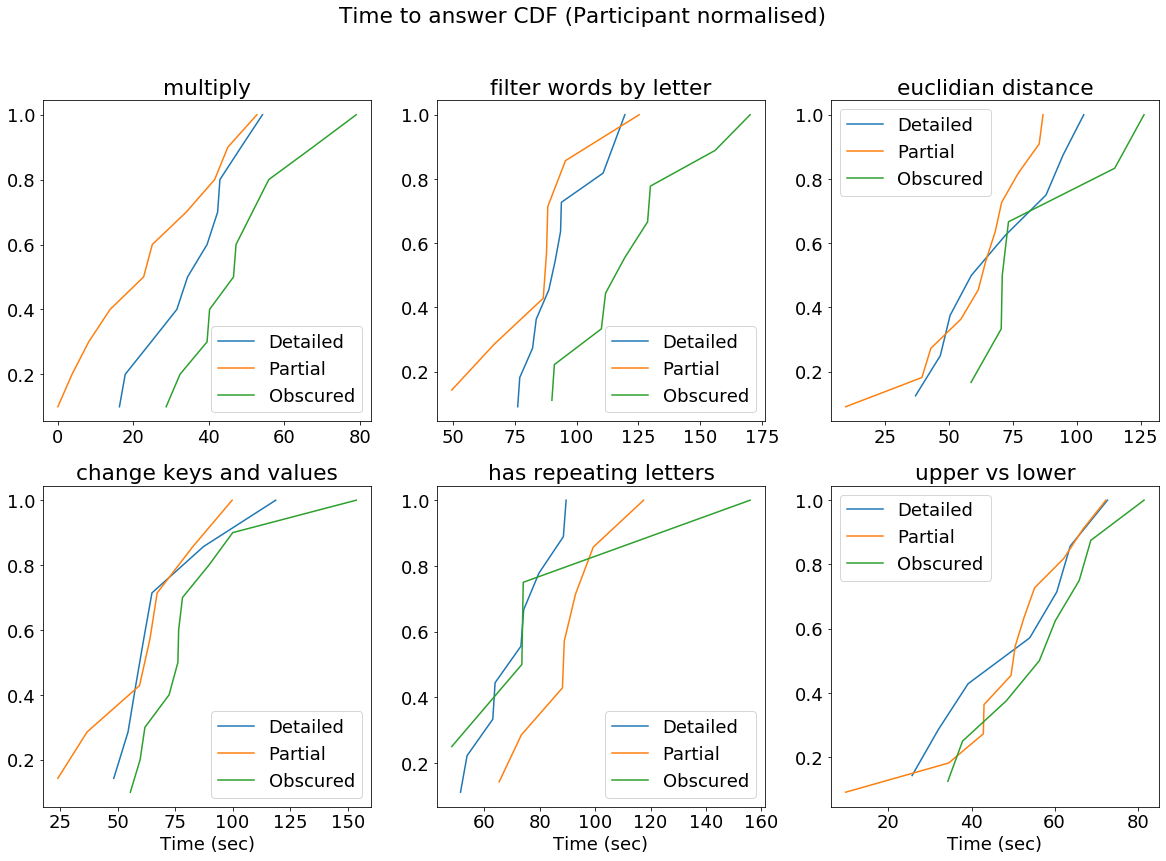

In [33]:
res = [[] for _ in range(6)]


for i_code_n in range(1,7):
    for i_code_t in range(3):
        temp_df = results_c[(results_c.code_number == i_code_n) & (results.code_type==i_code_t)]
        stats_df = temp_df.groupby('time_norm_u')['time_norm_u'].agg('count')
        
        res[i_code_n-1].append(stats_df.cumsum()/stats_df.sum())
f,ax = plt.subplots(2,3,figsize=(20,13))
q_types = ['Detailed','Partial','Obscured']
ax=ax.ravel()
for i_code_n in range(6):
    for i_code_t in range(3):
        ax[i_code_n].plot(res[i_code_n][i_code_t],label=q_types[i_code_t])
    ax[i_code_n].legend()
    ax[i_code_n].set_title(question_names[i_code_n+1])
    if i_code_n >2:
        ax[i_code_n].set_xlabel('Time (sec)')
plt.suptitle('Time to answer CDF (Participant normalised)')